In [3]:
import pandas as pd
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import os
from sklearn.preprocessing import StandardScaler
import seaborn as sns

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [74]:

cols = ['b_1','b_2','b_3','b_4','b_5','b_6','b_7','b_8','b_9','b_10','b_11','b_12','b_13','b_14','b_15','b_16','b_17','b_18','b_19','b_20','b_21','b_22','b_23','b_24','b_25','b_26','b_27','b_28','b_29','b_30']
def heat_map(array):
    plt.figure(figsize=(20,20))
    sns.set(font_scale=1.5)
    hm = sns.heatmap(array,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 12},yticklabels=cols,xticklabels=cols)
    plt.tight_layout()
    plt.show()

def normalixing_matrix(arr): ## array should be 300*30
    normed =(arr - arr.mean(axis=0)) / arr.std(axis=0)
    print("The shape of normed is", normed.shape)
    cov = np.cov(normed.T)
    return normed,cov


def eigendecomposition(array,k):
    eig_values, eig_vectors = np.linalg.eig(array)
    idx = np.argsort(eig_values, axis=0)[::-1]
    sorted_eig_vectors = eig_vectors[:, idx]
    cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
    xint = range(1, len(cumsum) + 1)
    plt.figure(figsize = (10,10))
    plt.plot(xint, cumsum)
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative explained variance")
    plt.xticks(xint)
    plt.xlim(1, 30, 1)
    req_eig_vectors = sorted_eig_vectors[:, 0:k]
    return req_eig_vectors


def diff(array):
    sum = 0
    for i in range(1,len(array)):
        sum = sum + abs(array[i] - array[i-1])
    sum = sum / len(array)-1
    return sum


def extractfeatures(array):
    lis = np.zeros(array.shape[1])
    for i in range(array.shape[1]):
        temp = array[:,i]
        lis[i] = diff(temp)
    return lis
        
        

(300, 30)
The shape of normed is (300, 30)
(30, 30)
[-0.99945134 -0.97896503 -0.96228689 -0.94604519 -0.89828924]


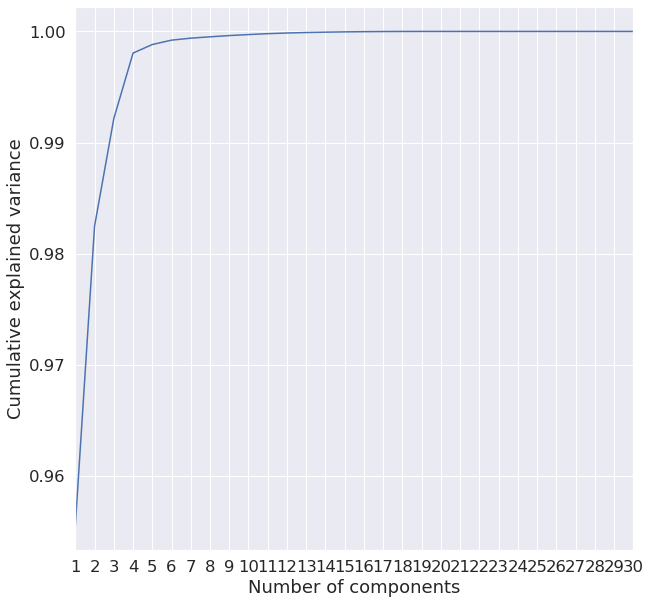

In [75]:
arr = np.load('chunk.npy')
trans = arr.T
print(trans.shape)
normed,cov = normalixing_matrix(trans)
print(cov.shape)
req_eig_vectors = eigendecomposition(cov,5)
features= extractfeatures(req_eig_vectors)
print(features)
#heat_map(cov)

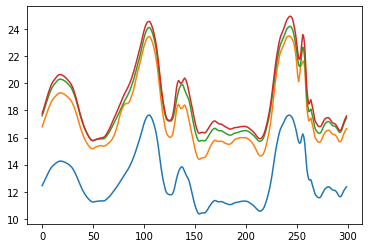

<><><><><><><><><><><><><>><><><><><><


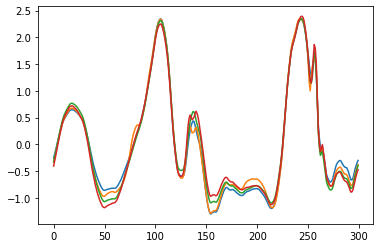

In [62]:
x = np.arange(300)
for i in range(4):
    plt.plot(x,trans[:,i])
plt.show()
print("<><><><><><><><><><><><><><><><><><><><><><><><><><>")
for i in range(4):
    plt.plot(x,normed[:,i])
    

In [39]:
eg_array = 5 + (np.random.randn(5, 5) * 2)
normed = (eg_array - eg_array.mean(axis=0)) / eg_array.std(axis=0)
print(eg_array)

print("<><><><><><><><><><><><><><><><><><><><><><")
print(normed)

[[5.90326571 5.85213741 4.48121134 8.44215381 5.72946173]
 [5.29095287 5.51253795 5.67556701 3.54695107 3.43528909]
 [3.25046443 2.89434405 1.29008514 4.92381588 7.67076292]
 [7.07278367 3.13451074 4.11857425 7.98038059 3.9297532 ]
 [3.25711497 2.61750204 4.59954498 6.81292482 4.54771552]]
<><><><><><><><><><><><><><><><><><><><><><
[[ 0.63124237  1.33500266  0.30566861  1.13470663  0.44079617]
 [ 0.22367337  1.08993072  1.12018219 -1.50920614 -1.07564593]
 [-1.13452097 -0.79948888 -1.87058063 -0.76555758  1.72399118]
 [ 1.40969945 -0.62617259  0.05836134  0.88530162 -0.74880645]
 [-1.13009422 -0.99927191  0.38636849  0.25475547 -0.34033497]]


In [71]:
i = 5
print(f'hih{i}')

hih5
